**Прогнозирование цен на жилье в Калифорнии с использованием нейронных сетей**

В данном примере используется нейронная сеть для прогнозирования цен на жилье в Калифорнии на основе данных, предоставленных датасетом California Housing. Данные разделены на обучающий и тестовый наборы, нормализованы, после чего создается модель нейронной сети с использованием TensorFlow. Модель обучается на обучающем наборе данных, а затем используется для предсказания цен на жилье на тестовом наборе. Рассчитываются метрики эффективности модели, такие как MSE, MAE и коэффициент детерминации (R^2 Score), для оценки ее производительности на тестовых данных. Дополнительно строится график, демонстрирующий соответствие фактических и предсказанных значений цен на жилье.

Первые 5 строк датасета:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Epoch 1/100
  1/516 [..............................] - ETA: 1:23 - loss: 5.2172

2024-05-30 22:55:14.625425: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


516/516 [==============================] - 0s 638us/step - loss: 1.2109 - val_loss: 0.5583
Epoch 2/100
516/516 [==============================] - 0s 483us/step - loss: 0.4840 - val_loss: 0.4594
Epoch 3/100
516/516 [==============================] - 0s 483us/step - loss: 0.4280 - val_loss: 0.4249
Epoch 4/100
516/516 [==============================] - 0s 483us/step - loss: 0.4025 - val_loss: 0.4163
Epoch 5/100
516/516 [==============================] - 0s 479us/step - loss: 0.3858 - val_loss: 0.3886
Epoch 6/100
516/516 [==============================] - 0s 481us/step - loss: 0.3745 - val_loss: 0.3815
Epoch 7/100
516/516 [==============================] - 0s 482us/step - loss: 0.3685 - val_loss: 0.3730
Epoch 8/100
516/516 [==============================] - 0s 479us/step - loss: 0.3583 - val_loss: 0.3682
Epoch 9/100
516/516 [==============================] - 0s 483us/step - loss: 0.3506 - val_loss: 0.3706
Epoch 10/100
516/516 [==============================] - 0s 480us/step - loss: 0.3463 

Epoch 80/100
516/516 [==============================] - 0s 482us/step - loss: 0.2862 - val_loss: 0.3015
Epoch 81/100
516/516 [==============================] - 0s 480us/step - loss: 0.2869 - val_loss: 0.3093
Epoch 82/100
516/516 [==============================] - 0s 482us/step - loss: 0.2851 - val_loss: 0.2954
Epoch 83/100
516/516 [==============================] - 0s 492us/step - loss: 0.2854 - val_loss: 0.2964
Epoch 84/100
516/516 [==============================] - 0s 496us/step - loss: 0.2852 - val_loss: 0.2957
Epoch 85/100
516/516 [==============================] - 0s 487us/step - loss: 0.2851 - val_loss: 0.3065
Epoch 86/100
516/516 [==============================] - 0s 514us/step - loss: 0.2837 - val_loss: 0.2987
Epoch 87/100
516/516 [==============================] - 0s 498us/step - loss: 0.2846 - val_loss: 0.2954
Epoch 88/100
516/516 [==============================] - 0s 482us/step - loss: 0.2849 - val_loss: 0.2950
Epoch 89/100
516/516 [==============================] - 0s 481us

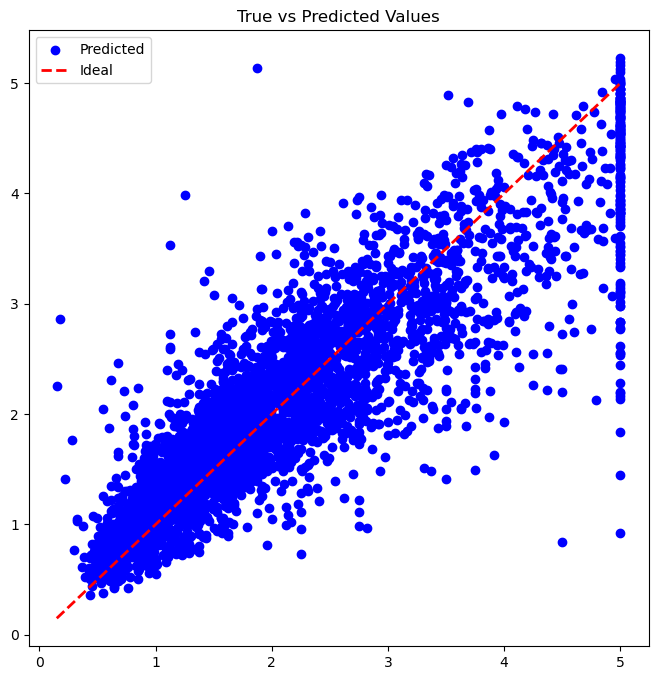

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Загрузка датасета California Housing
california_housing = datasets.fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Создание DataFrame для удобного отображения данных
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = y

# Вывод первых нескольких строк датасета
print("Первые 5 строк датасета:")
print(df.head())

# Разделение датасета на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели регрессии
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Один нейрон для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Построение аппроксимации
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(x_range, y_range, color='red', linestyle='--', linewidth=2, label='Ideal')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

